# <center>SORTOWANIA LINIOWE</center>

0. Dolne ograniczenie na szybkość sortowania

Założyliśmy na początku części sortowań, że interesuje nas problem, w którym mamy ciąg danych z operatorem $\leq$ i chcemy zwrócić konkretną permutację (monotoniczną), a jedyny dostęp do danych to porównanie.

Rozważmy drzewo procesu sortowania:
 - weźmy zestaw danych: </br>
  $\begin{matrix} \text{wartości:} & x & y & z & \\ \text{indeksy:} & 0 & 1 & 2 \\ \end{matrix}$
 - rozrysujmy decyzje jakie są podejmowane w konkretnych przypadkach (sytuacje ujęte w kółkach)
 - posługujemy się indeksami, na samej górze rozważamy czy element o indeksie $0$ jest mniejszy od elementu o indeksie $1$
 - w prostokątach są rozpisane wyniki

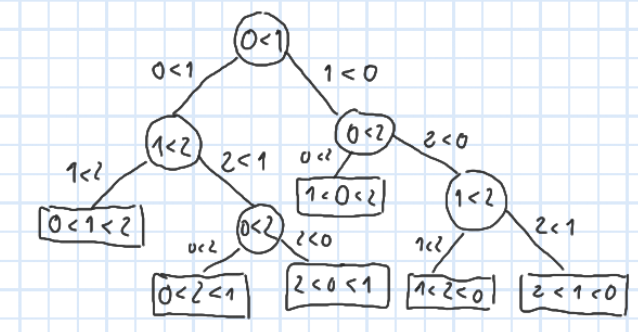

Zauważmy, że każdy liść tego drzewa jest pewną permutacją, zatem możliwych wyników (liści) jest co najmniej $n!$ (co najmniej ze względu na brak kontroli liczby porównań - tworzenie niepotrzebnych liści)

Drzewo binarne o wysokości $h$ ma najwyżej $2^h$ liści, a $n!$ można ograniczyć z góry przez właśnie liczbę liści, zatem:
 - $n! \leq 2^h $ 


Wysokość naszego drzewa to co najmniej: 
 - $log(n!)$
 - $nlogn = log(n^n) \geq log(n!)$
 - $log(n!) \geq log(\frac{n}{2}^{\frac{n}{2}}) = \frac{n}{2}log(n-1)$

Zatem sortowanie oparte na porównywaniu danych musi mieć co najmniej czas $nlogn$


1. Sortowanie przez zliczanie (counting sort)

Idea:
 - mamy tablicę $A$, która zawiera liczby naturalne z zakresu $\{0,k-1\}$ - bardzo ważny aspekt 
 - chcemy zliczyć wystąpienia elementów o danej wartości w tablicy $C$, z zastrzeżeniem, że wiemy ile jest elementów przed tym elementem (ważne dla spisywania od końca wystąpienia wartości), a następnie je spisywać do tablicy wyjściowej $B$ od końca

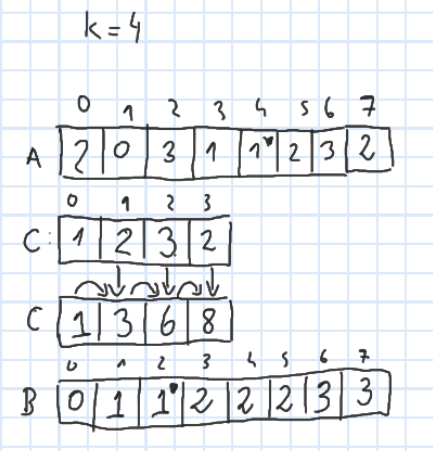

2. Analiza złożoności sortowania przez zliczanie

Założenie, że liczby są z danego przedziału i ponadto są naturalne gwarantuje nam lepszą złożoność niż $nlogn$:
 - to nie znaczy, że wywód w punkcie 0. jest do kosza, bo rozważane drzewo procesu sortowania realizuje założenie porównywania liczb, a w algorytmie sortowania przez zliczanie NIGDY nie korzystamy z żadnego porównania, interesuje nas tylko ile jest wystąpień - jest to inny model obliczeń
 - dla $k$ dużych rzędów np. $n^2$ sytuacja jest inna i nie otrzymamy lepszej złożoności korzystając z książkowego sortowania przez zliczanie

Złożoność algorytmu wynosi $\Theta(n+k)$, gdzie $n$ to liczba elementów, a $k$ to wartość graniczna zakresu.

In [16]:
def counting_sort(A, k):
    n = len(A)
    B = [0 for _ in range(n)]
    C = [0 for _ in range(k+1)]
    for i in range(n):  # zliczanie ilosci elementow o danej wartosci
        C[A[i]] += 1
    # gwarancja stabilności teraz na i-tej pozycji jest zapisane ile jest elementow =>i
    for i in range(1, k+1):
        C[i] += C[i-1]
    # spisywanie od końca z pomoca tablicy C, w przypadku kilku takich samych wartosci sa wpisywane
    for i in range(n-1, -1, -1):
        # tez od konca z pierwsza wpisana na ostatnie mozliwe miejsce
        B[C[A[i]]-1] = A[i]
        C[A[i]] -= 1
    return B

def check(A, k):
    print("range of elements: {0,",str(k)+"}")
    print("input array: ",end='')
    print(*A)
    F=counting_sort(A,k)
    print("output array: ",end='')
    print(*F)
    print()
    
A1 = [2, 2, 5, 4, 1, 7, 5, 3, 2, 1, 5, 3, 2, 3, 3, 4, 0, 0, 0]
K1 = 7

check(A1,K1)

range of elements: {0, 7}
input array: 2 2 5 4 1 7 5 3 2 1 5 3 2 3 3 4 0 0 0
output array: 0 0 0 1 1 2 2 2 2 3 3 3 3 4 4 5 5 5 7



3. Sortowanie pozycyjne (radix sort)

Idea:
 - najlepiej zrozumieć ten algorytm na przykładzie
 - weźmy słowa: kra, art, ort, kot, kit, ati, kil
 - możemy użyć sortowania przez zliczanie do sortowania słow po konkretnych literach
 - chcemy sortować od ostatnich pozycji, aby uniknąć dodatkowych wywołań sortowania przez zliczanie - słowa zaczynające się na tę samą literę należałoby sortować osobno

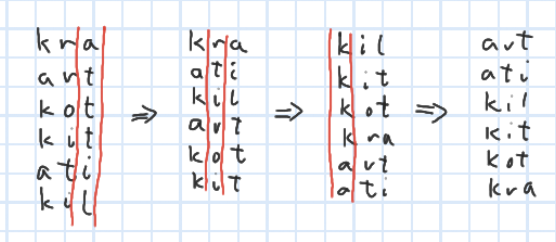

4. Analiza złożoności sortowania pozycyjnego

Aby wykonać sortowanie $n$ słow, gdzie każde ma dlugość $t$, musieliśmy wykonać dla każdej pozycji pracę $n$

Otrzymujemy złożoność $\Theta(nt)$, gdzie $n$ to liczba słów, z każde słowo ma długość $t$

In [18]:
def counting_sort(A, k,idx):
    n = len(A)
    B = [0 for _ in range(n)]
    C = [0 for _ in range(k+1)]
    for i in range(n):
        C[ord(A[i][idx])-ord('a')] += 1
    for i in range(1, k+1):
        C[i] += C[i-1]
    for i in range(n-1, -1, -1):
        B[C[ord(A[i][idx])-ord('a')]-1] = A[i]
        C[ord(A[i][idx])-ord('a')] -= 1
    return B

def radix_sort(A,t):
    for i in range(t-1,-1,-1):
        A=counting_sort(A,26,i)
    return A


A1=['kra','art','ort','kot','kit','ati','kil']
T1=len(A1[0])

def check(A,t):
    print("words before sorting: ",end='')
    print(*A)
    print("words after sorting: ",end='')
    print(*radix_sort(A,t))
    print()

check(A1,T1)


words before sorting: kra art ort kot kit ati kil
words after sorting: art ati kil kit kot kra ort



5. Sortowanie kubełkowe (bucket sort)

Założenia:
 - mamy tablicę $A$ liczb wymiernych, każda liczba jest z danego przedziału $\{n,m\}$, a dane zostały otrzymane z rozkładu jednostajnego

Idea:
 - chcemy stworzyć listę $n$ kubełków (listę list), a każdemu kubełkowi przyporządkować liczby z danego podprzedziału: </br>
$\begin{matrix} \text{kubełki:} & \text{kubełek } 0 & \text{kubełek } 1 & ... & \text{kubełek } n-1 \\ \text{zakresy:} & [0,\frac{1}{n}) & [\frac{1}{n},\frac{2}{n}) & ... & [\frac{n-1}{n},\frac{n}{n}) \\ \end{matrix}$
 - przeglądając tablicę $A$ przyporządkowanie następuje w sposób taki, że liczba $A[i]$ umieszczona zostaje w kubełku $\lfloor n \cdot A[i] \rfloor$
 - każdy kubełek sortujemy, bo zakładamy, że liczba elementów w kubełkach, będzie mała (używamy np. sortowania prostego, bo na małych danych jest często wydajniejsze od bardziej skomplikowanych algorytmów)
 - finalnie chcemy po prostu przepisać zawartości kubełków

Złożoność algorytmu wynosi: $\Theta(n)$


In [29]:
def bucket_sort(A):
    n=len(A)
    norm = max(A) # będzimy chcieli normalizować wartość do największej
    buckets = [[] for _ in range(n)]  # tworzenie n kubełków

    for num in A:
        normNum = num/norm  # znormalizowana wartośc
        bucketInd = int(n*normNum - 1 if normNum*n > 0 else 0)  # wybór kubełka
        buckets[bucketInd].append(num)

    for i in range(n):  # sortowanie wartości w kubełkach
        buckets[i] = sorted(buckets[i])

    output = []

    for i in range(n):
        for j in range(len(buckets[i])):
            output.append(buckets[i][j])

    return output

A1=[3.98272,
2.22344,
0.62157,
2.51640,
1.05667,
1.33457,
0.21292,
1.49864,
0.27731,
1.90476,
1.34441,
0.46016,
2.50581,
3.34523,
2.00470,
4.39267
]

def check(A):
    print("input array: ",end='')
    print(*A)
    F=bucket_sort(A)
    print("output array: ",end='')
    print(*F)
    print()
    
check(A1)


input array: 3.98272 2.22344 0.62157 2.5164 1.05667 1.33457 0.21292 1.49864 0.27731 1.90476 1.34441 0.46016 2.50581 3.34523 2.0047 4.39267
output array: 0.21292 0.27731 0.46016 0.62157 1.05667 1.33457 1.34441 1.49864 1.90476 2.0047 2.22344 2.50581 2.5164 3.34523 3.98272 4.39267

